# 6.6 Sourcing & Analyzing Time-Series Data

### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the Federal Reserve Economic Data

# 01. Importing your libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight')

In [2]:
# Configure API key 

quandl.ApiConfig.api_key = 'UVUQsxQByhcXysmqveSx'

In [3]:
# Importing the Federal Reserve Economic Data "Civilian Employment-Population Ratio" variable.

data = quandl.get('FRED/EMRATIO')

In [4]:
# Checking output
data.head(5)

,Value
Date,
1948-01-01,56.6
1948-02-01,56.7
1948-03-01,56.1
1948-04-01,56.7
1948-05-01,56.2


In [5]:
data.shape

(889, 1)

In [6]:
data.columns

Index(['Value'], dtype='object')

In [7]:
type(data)

pandas.core.frame.DataFrame

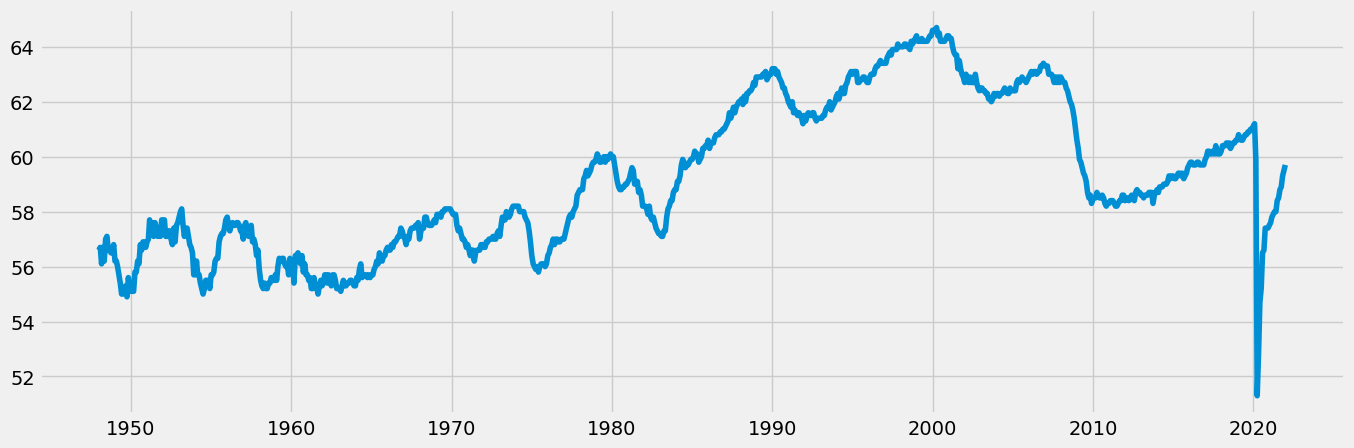

In [8]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100)

plt.plot(data)

# 02. Subsetting, wrangling, and cleaning time-series data

In [9]:
# Reset index so that you can use the "Date" column as a filter

data_2 = data.reset_index()

In [10]:
# Checking output
data_2.head()

,Date,Value
0,1948-01-01,56.6
1,1948-02-01,56.7
2,1948-03-01,56.1
3,1948-04-01,56.7
4,1948-05-01,56.2


In [11]:
# Creating a subset for necessary data
data_sub = data_2.loc[(data_2['Date'] >= '1980-01-01') & (data_2['Date'] < '2022-12-01')]

In [12]:
# Checking output
data_sub.shape

(505, 2)

In [13]:
data_sub.head()

,Date,Value
384,1980-01-01,60.0
385,1980-02-01,60.0
386,1980-03-01,59.7
387,1980-04-01,59.4
388,1980-05-01,59.1


In [14]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date"
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Value
datetime,
1980-01-01,60.0
1980-02-01,60.0
1980-03-01,59.7
1980-04-01,59.4
1980-05-01,59.1


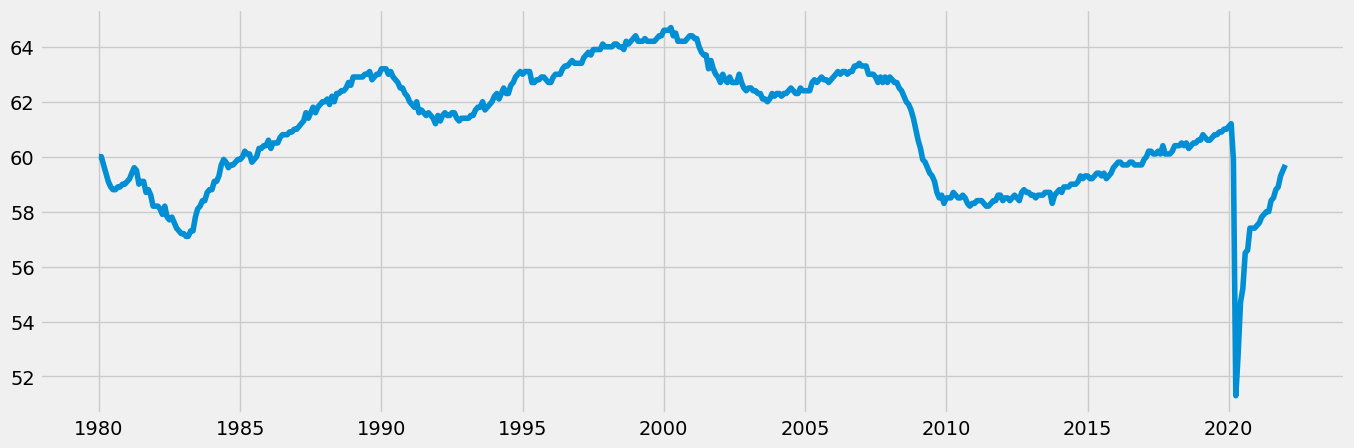

In [15]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [16]:
# Check for missing values

data_sub.isnull().sum() 

Value    0
dtype: int64

In [17]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

422

### 3. Time-series analysis: decomposition

In [18]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [19]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

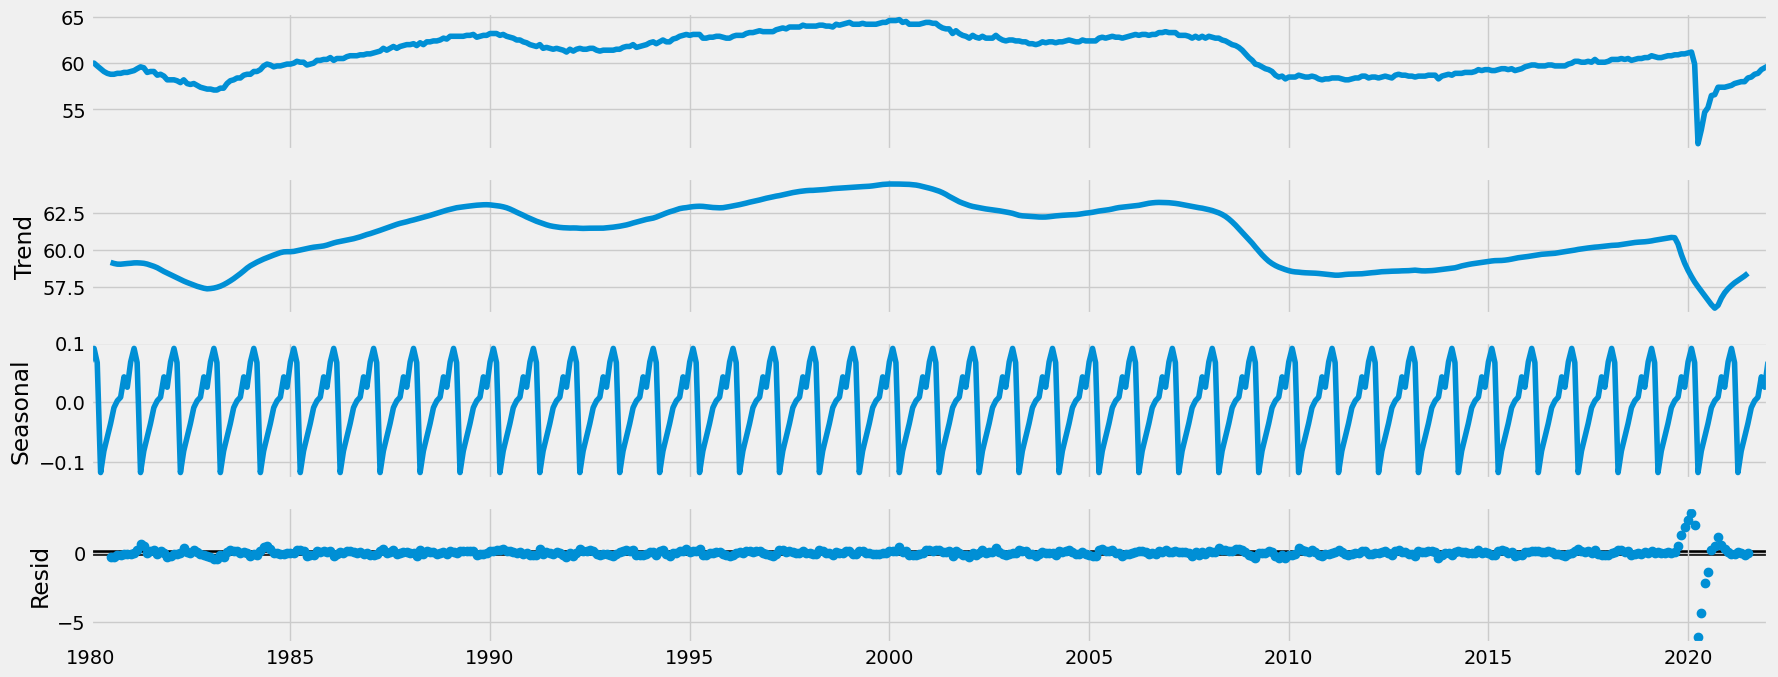

In [20]:
# Plot the separate components

decomposition.plot()
plt.show()